In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


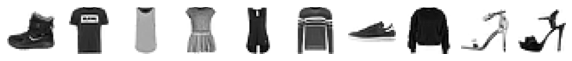

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
train_scaled.shape

(60000, 784)

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/Users/seunghoonyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/seunghoonyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/seunghoonyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/seunghoonyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

0.8192833333333333


In [11]:
import tensorflow as tf

In [12]:
from tensorflow import keras

In [13]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

In [14]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [15]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [16]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [17]:
model = keras.Sequential(dense)

2022-06-01 11:39:05.533862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [19]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [20]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 752us/step - loss: 0.6097 - accuracy: 0.7938
Epoch 2/5
1500/1500 [==============================] - 1s 716us/step - loss: 0.4789 - accuracy: 0.8397
Epoch 3/5
1500/1500 [==============================] - 1s 713us/step - loss: 0.4558 - accuracy: 0.8485
Epoch 4/5
1500/1500 [==============================] - 1s 683us/step - loss: 0.4440 - accuracy: 0.8530
Epoch 5/5
1500/1500 [==============================] - 1s 760us/step - loss: 0.4374 - accuracy: 0.8551


In [21]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4737 - accuracy: 0.8388


[0.4736781120300293, 0.8388333320617676]

# 7-2 심층 신경망 deep neural net

In [22]:
from tensorflow import keras 
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [23]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

## 두 개의 층 만들기

In [24]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [25]:
model = keras.Sequential([dense1, dense2])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 층을 추가하는 다른 방법

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [29]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )))
model.add(keras.layers.Dense(10, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5648 - accuracy: 0.8070
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4093 - accuracy: 0.8538
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3729 - accuracy: 0.8659
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3508 - accuracy: 0.8733
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3336 - accuracy: 0.8797


## 렐루 함수

In [34]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [37]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [38]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5363 - accuracy: 0.8111
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3913 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3556 - accuracy: 0.8711
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3355 - accuracy: 0.8792
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3221 - accuracy: 0.8856


In [39]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 848us/step - loss: 0.3706 - accuracy: 0.8748


[0.37057650089263916, 0.874833345413208]

In [40]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [41]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [42]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [43]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [44]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [45]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [46]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 2s 989us/step - loss: 0.2966 - accuracy: 0.8915
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2794 - accuracy: 0.8974
Epoch 3/50
1500/1500 [==============================] - 1s 993us/step - loss: 0.2673 - accuracy: 0.8996
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2595 - accuracy: 0.9047
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2483 - accuracy: 0.9089
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2408 - accuracy: 0.9106
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2328 - accuracy: 0.9138
Epoch 8/50
1500/1500 [==============================] - 1s 990us/step - loss: 0.2248 - accuracy: 0.9166
Epoch 9/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2186 - accuracy: 0.9184
Epoch 10/50
1500/1500 [==============================] - 2s 1ms/step - loss:

In [49]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 960us/step - loss: 0.4932 - accuracy: 0.8874


[0.493157297372818, 0.887416660785675]

# 7-3 Neural Network Model Training

## 손실 곡선

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-06-01 12:43:05.482060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


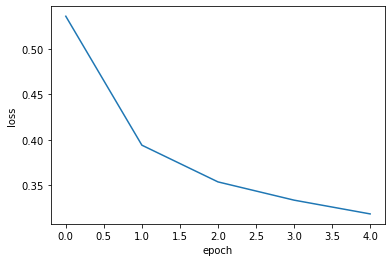

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

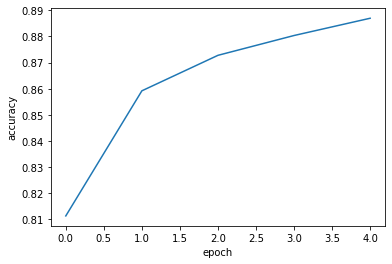

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

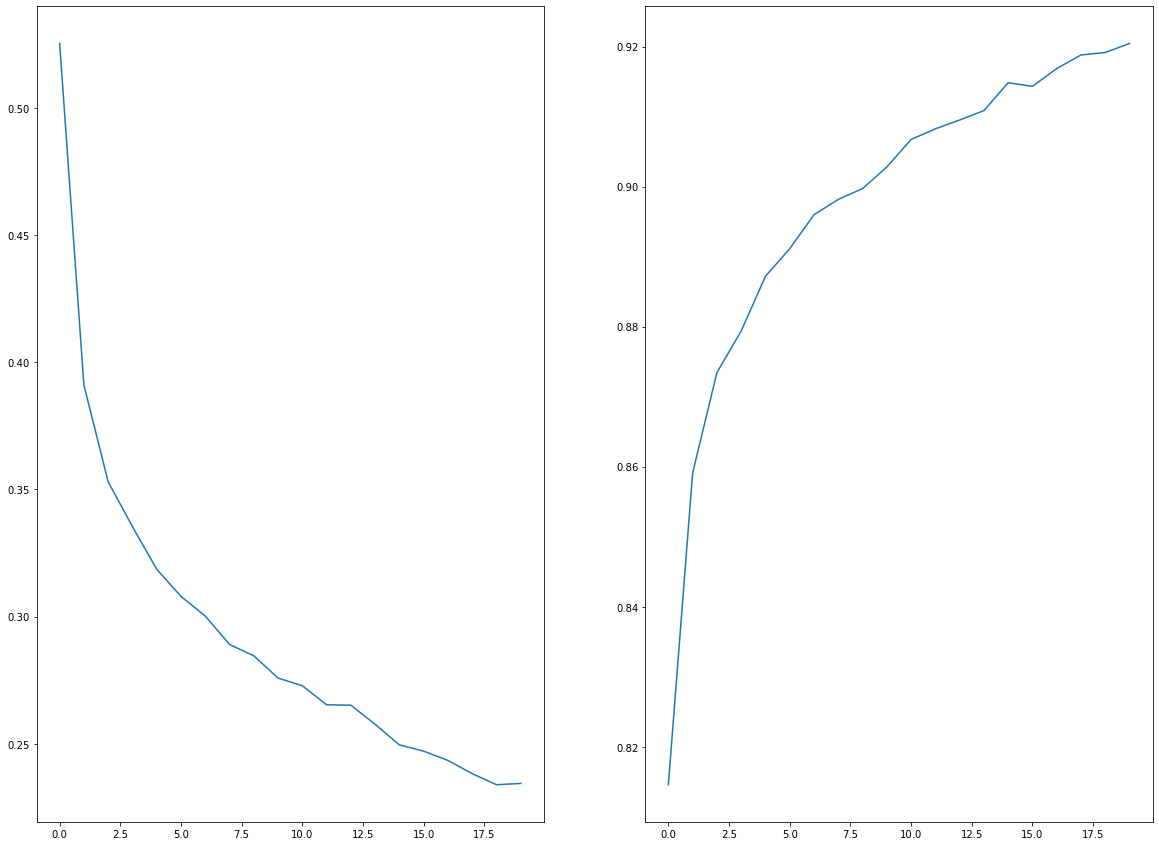

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
fig, axs = plt.subplots(1, 2, figsize=(20, 15))
axs[0].plot(history.history['loss'])
axs[1].plot(history.history['accuracy'])
plt.show()

## 검증 손실

In [12]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


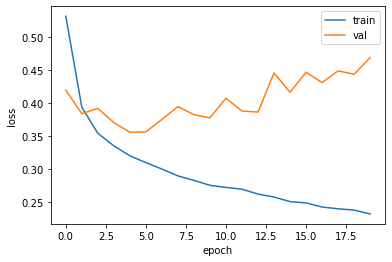

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

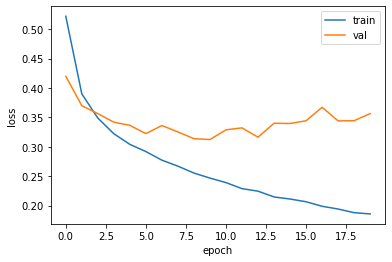

In [15]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## Dropout

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


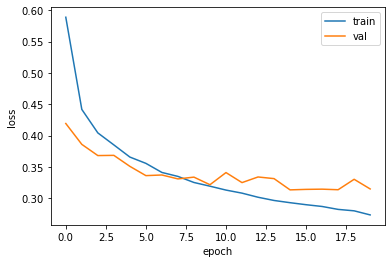

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [21]:
model.save_weights('model-weights.h5')

In [22]:
model.save('model-whole.h5')

In [23]:
!ls -al *.h5

-rw-r--r--  1 seunghoonyang  staff  333448 Jun  1 13:06 model-weights.h5
-rw-r--r--  1 seunghoonyang  staff  982664 Jun  1 13:06 model-whole.h5


In [24]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [25]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 799us/step
0.881


In [26]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 872us/step - loss: 0.3323 - accuracy: 0.8810


[0.33228039741516113, 0.8809999823570251]

## CALLBACK

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), 
          callbacks=[checkpoint_cb])

In [28]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 887us/step - loss: 0.3187 - accuracy: 0.8863


[0.31874650716781616, 0.8863333463668823]

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), 
          callbacks=[checkpoint_cb, early_stopping_cb])

In [33]:
print(early_stopping_cb.stopped_epoch)

8


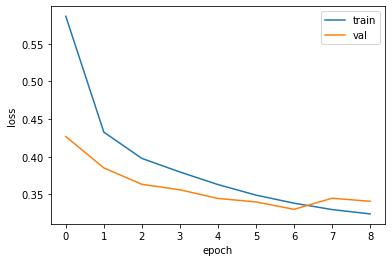

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [35]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 933us/step - loss: 0.3303 - accuracy: 0.8767


[0.3302924335002899, 0.8766666650772095]